# Loan data from prosper 
## by Mahmoud Yassin

## Preliminary Wrangling

> Prosper is a peer-to-peer lender that provides personal loans to borrowers with fair or good credit. In This Journey we will explore `Loan data from prosper` dataset which includes`113937` observations and `81` variable including loan status, borrowerAPR, borrower rate , term and more

In [1]:
# import all packages and set plots to be embedded inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan_data =  pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# viewing the shape of the dataset
loan_data.shape

(113937, 81)

In [4]:
# checking for duplicates
loan_data.duplicated().sum()

0

In [5]:
# selecting the features of interest
features_of_interest = ['ListingCreationDate', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatus', 
                       'StatedMonthlyIncome', 'DebtToIncomeRatio', 'BorrowerAPR' ]
loan_data_filtered = loan_data[features_of_interest]

In [6]:
# showing general information about the selected subset of the data
loan_data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
ListingCreationDate      113937 non-null object
LoanOriginalAmount       113937 non-null int64
Term                     113937 non-null int64
ProsperRating (Alpha)    84853 non-null object
ProsperScore             84853 non-null float64
EmploymentStatus         111682 non-null object
StatedMonthlyIncome      113937 non-null float64
DebtToIncomeRatio        105383 non-null float64
BorrowerAPR              113912 non-null float64
dtypes: float64(4), int64(2), object(3)
memory usage: 7.8+ MB


In [7]:
# checking for missing values
loan_data_filtered.isnull().sum()

ListingCreationDate          0
LoanOriginalAmount           0
Term                         0
ProsperRating (Alpha)    29084
ProsperScore             29084
EmploymentStatus          2255
StatedMonthlyIncome          0
DebtToIncomeRatio         8554
BorrowerAPR                 25
dtype: int64

> As the `BorrowerAPR` is core of the analysis and it has few missing values(25) I will choose to drop the These rows

In [8]:
# removing rows with missing values
loan_data_filtered = loan_data_filtered.dropna(subset=['BorrowerAPR'])

In [9]:
# testing the removal of missing values
loan_data_filtered.isnull().sum()

ListingCreationDate          0
LoanOriginalAmount           0
Term                         0
ProsperRating (Alpha)    29059
ProsperScore             29059
EmploymentStatus          2230
StatedMonthlyIncome          0
DebtToIncomeRatio         8554
BorrowerAPR                  0
dtype: int64

In [10]:
# replace the missing values of the EmploymentStatus columns with "unknown"
loan_data_filtered.EmploymentStatus.fillna('unknown', inplace=True)

In [11]:
# testing the replacing of the missing values 
print(loan_data_filtered.EmploymentStatus.value_counts())
assert(loan_data_filtered.EmploymentStatus.isnull().sum() == 0)

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
unknown           2230
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64


In [12]:
# investigating the missing values of DebtToIncomeRatio columns
missing_ratio_porportion = loan_data_filtered.DebtToIncomeRatio.isnull().sum() / loan_data_filtered.shape[0]
print('the porpotion of the missing debt to income ratio is {:.2f} %'.format(missing_ratio_porportion*100))

the porpotion of the missing debt to income ratio is 7.51 %


> According to the dataset documenatation `DebtToIncomeRatoi` is null if not availabe. And in order to preserve the most ovservaions as the missing values is about 7.5 % I will choose to replace them with the mean value

In [13]:
#replacing the missing values of `debttoincomeratio` column with the it's mean
dtir_mean = loan_data_filtered.DebtToIncomeRatio.mean()
loan_data_filtered.DebtToIncomeRatio.fillna(dtir_mean, inplace=True)

In [14]:
# testing the filling of the missing values
assert loan_data_filtered.DebtToIncomeRatio.isnull().sum() == 0

> ProsperScore and ProsperRating (Alpha) has the same number of missing values and the documentation states that these values are applicable for loans originated  after july 2009. So, Lets investigate to see if this is the case here

In [15]:
# first I will convert ListingCreationDate to datetime dtype 
loan_data_filtered.ListingCreationDate = pd.to_datetime(loan_data_filtered.ListingCreationDate)

In [16]:
# verify that the missing values is the same for both columns
# This should be True
ind_rating_nval =pd.Index(loan_data_filtered[loan_data_filtered['ProsperRating (Alpha)'].isnull()].index)
ind_score_nval = pd.Index(loan_data_filtered[loan_data_filtered['ProsperScore'].isnull()].index)
ind_rating_nval.equals(ind_score_nval)

True

In [17]:
# checking the ListingCreationDate for these missing values
loan_data_filtered[loan_data_filtered['ProsperRating (Alpha)'].isnull()].ListingCreationDate.describe()

count                          29059
unique                         29059
top       2006-08-08 11:54:22.790000
freq                               1
first     2006-01-06 15:21:19.047000
last      2009-05-06 23:55:16.543000
Name: ListingCreationDate, dtype: object

> As expected the creation date for the loans with missing score and rating is before July 2009. So There is no way we can know these values because they have never been generated in the first place
> So I will choose to drop these values and only analyze data originated after July 2009

In [18]:
# Dropping row with missing ProsperScore and ProsperRating (Alpha)
loan_data_filtered.dropna(subset=['ProsperScore', 'ProsperRating (Alpha)'], inplace=True)

In [19]:
# checking the values of the `StatedMonthlyIncome` columns:
loan_data_filtered.StatedMonthlyIncome.describe()

count    8.485300e+04
mean     5.931175e+03
std      8.239944e+03
min      0.000000e+00
25%      3.434000e+03
50%      5.000000e+03
75%      7.083333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

It's obvious that there is outliers in the `StatedMonthlyIncome` Column that needs further investigation

In [20]:
# investigating rows with monthly income greater than 30k
loan_data_filtered.query('StatedMonthlyIncome > 30000')

,ListingCreationDate,LoanOriginalAmount,Term,ProsperRating (Alpha),ProsperScore,EmploymentStatus,StatedMonthlyIncome,DebtToIncomeRatio,BorrowerAPR
196,2012-10-18 14:53:24.960,25000,60,A,9.0,Employed,33333.333333,0.040000,0.15752
224,2014-01-10 07:24:44.853,30000,36,A,11.0,Employed,33333.333333,0.110000,0.13799
307,2013-12-10 08:27:57.030,15000,36,A,4.0,Self-employed,40000.000000,0.275993,0.15223
637,2013-05-23 09:31:31.077,35000,36,B,6.0,Employed,31666.666667,0.080000,0.19236
1003,2013-09-06 13:27:12.037,4000,36,A,10.0,Self-employed,41666.666667,0.030000,0.13799
...,...,...,...,...,...,...,...,...,...
111265,2013-06-19 06:54:27.577,12765,60,B,9.0,Employed,108750.000000,0.030000,0.20593
112211,2011-10-03 08:55:43.310,25000,36,A,9.0,Employed,30416.666667,0.080000,0.16056
112921,2013-10-24 19:39:25.217,19000,36,AA,11.0,Employed,31666.666667,0.070000,0.06726
113270,2013-02-20 19:23:37.430,2000,36,C,6.0,Employed,394400.000000,0.000000,0.22712


In [21]:
# viewing the mean loan amount for observations with monthly income greater than 30k
loan_data_filtered.query('StatedMonthlyIncome > 30000').LoanOriginalAmount.mean()

16028.281124497991

In [22]:
# viewing the Terms of these loans
loan_data_filtered.query('StatedMonthlyIncome > 30000').Term.value_counts()

36    178
60     61
12     10
Name: Term, dtype: int64

In [23]:
# viewing the porportion of monthly income greater than 30k
loan_data_filtered.query('StatedMonthlyIncome > 30000').StatedMonthlyIncome.count()/loan_data_filtered.shape[0]

0.0029344867005291504

> Around 0.29 percent of the data have monthly income greater than 30k and at the same time having average loan amount around 15k with some values much less than that and also the most data points have a three year term. So It seems that these values are not corret or at least seems suspicious

> the outliers of monthly income can be misleading in the following part of the analysis so I will choose to drop the observations with monthly income greater than 30k 

In [24]:
loan_data_filtered =  loan_data_filtered.query('StatedMonthlyIncome <= 30000')

In [25]:
# checking the values of PrsoperScore as it should be from 1 to 10
loan_data_filtered.ProsperScore.value_counts()

4.0     12558
6.0     12264
8.0     12008
7.0     10569
5.0      9794
3.0      7621
9.0      6879
2.0      5757
10.0     4722
11.0     1443
1.0       989
Name: ProsperScore, dtype: int64

#### It seems that there is some observations with `prosperScore` greater than ten And according to the documentation the values is from 1 to 10 with 10 being the best . becuase there is no way to find out why this happenned I will choose to drop these observations

In [26]:
# removing observations with ProsperScore that is equal to 11

loan_data_filtered = loan_data_filtered.query('ProsperScore != 11 ')

In [27]:
loan_data_filtered.shape

(83161, 9)

In [28]:
# checking the success of removal of observations that have ProsperScore greater that ten
np.sort(loan_data_filtered.ProsperScore.unique())

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [29]:
# changing the data type of prosper score to object
loan_data_filtered.ProsperScore = loan_data_filtered.ProsperScore.astype(int).astype(str)

In [30]:
# checking the dataype of prosper score
loan_data_filtered.ProsperScore.dtype

dtype('O')

In [31]:
# building a function that will help converting some variables to category data type
def to_category(df, column, categories, ordered=False):
    '''This function converts a variable to category data type
    df: is the dataframe that have the variable
    column: the name of the variable
    categories: list of the categories of the variable
    ordered: whether or not the categories are ordered(pool)'''
    category_type = pd.api.types.CategoricalDtype(ordered=ordered, categories=categories)
    df[column] = df[column].astype(category_type)

In [32]:
# changing the dtype of ProsperRating (Alpha) to ordered categorical dtype
ratings = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
to_category(loan_data_filtered, 'ProsperRating (Alpha)', ratings, ordered=True)

In [33]:
loan_data_filtered['ProsperRating (Alpha)'].dtype

CategoricalDtype(categories=['HR', 'E', 'D', 'C', 'B', 'A', 'AA'], ordered=True)

In [34]:
# changing the dtype of ProsperScore to ordered Categorical dtype
scores = np.sort(loan_data_filtered.ProsperScore.unique().astype(int)).astype(str)
to_category(loan_data_filtered, 'ProsperScore', scores, ordered=True)

In [35]:
loan_data_filtered.ProsperScore.dtype

CategoricalDtype(categories=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], ordered=True)

In [36]:
# changing the values of the Term feature to more easier to interpret format
months_to_years = {12: 'one_year', 36: 'three_years', 60 :'five_years'}
loan_data_filtered.Term = loan_data_filtered.Term.map(months_to_years)

In [37]:
# changing the dtype of the Term variable to ordered categorical dtype
terms = ['one_year', 'three_years', 'five_years']
to_category(loan_data_filtered, 'Term', terms, ordered=True)

In [38]:
# checking the data types of all variables
loan_data_filtered.dtypes

ListingCreationDate      datetime64[ns]
LoanOriginalAmount                int64
Term                           category
ProsperRating (Alpha)          category
ProsperScore                   category
EmploymentStatus                 object
StatedMonthlyIncome             float64
DebtToIncomeRatio               float64
BorrowerAPR                     float64
dtype: object

In [39]:
loan_final = loan_data_filtered.copy()

In [40]:
# storing the loan_final in 'loan_final.csv'
if not os.path.exists('loan_final.csv'):
    loan_final.to_csv('loan_final.csv', index=False)

In [41]:
loan_final.shape

(83161, 9)

### The structure of our dataset?

* The orginal dataset includes `113937` observations and `81` variables
* The subset chosen for analysis after cleaning includes `83161` observations and `9` variables


### The main feature of interest in our dataset?

> The main feature of interest is `BorrowerAPR`

### Features in the dataset that could help support our investigation into our feature of interest?

> I expect that the following features will have an effect on the `BorrowerAPR`:
* ListingCreationDate
* Term
* ProsperRating(Alpha)
* ProsperScore
* EmploymentStatus
* DebtToIncomeRatio
* StatedMonthlyIncome
* LoanOriginalAmount

## Univariate Exploration


### We will start examining the main feature of interest (`BorrowerAPR`)

In [42]:
# viewing descriptive statistics of the BorrowerAPR variable
loan_final.BorrowerAPR.describe()

count    83161.000000
mean         0.228730
std          0.079013
min          0.045830
25%          0.167320
50%          0.221400
75%          0.293410
max          0.423950
Name: BorrowerAPR, dtype: float64

> The mean is close to the median that indicates that distribution is normal

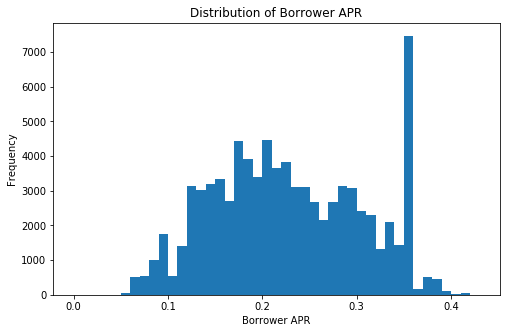

In [43]:
# viewing the distribution of the BorrowerAPR column
plt.figure(figsize=(8, 5))
bins = np.arange(0, loan_final.BorrowerAPR.max()+0.01, 0.01)
sns.distplot(loan_final.BorrowerAPR, kde=False, bins=bins, hist_kws={'alpha': 1});
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
plt.title('Distribution of Borrower APR');

> As expected the plot is normally ditributed except a very big peak around 0.35 with a few points with more than 0.4 APR

### Next we will examine the `Term` variable

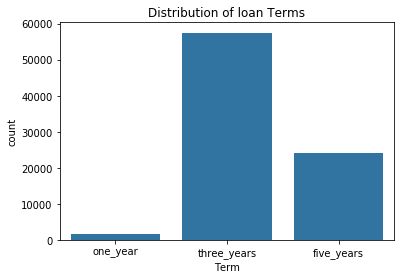

In [44]:
base_color = sns.color_palette()[0]
sns.countplot(data=loan_final, x='Term', color=base_color);
plt.title('Distribution of loan Terms');

> It seems that the most loans Term is a three year term and few loans with one year term

### Next we will investigate the `LoanOriginalAmount` variable

In [45]:
# view descriptive statistics of the variable
loan_final.LoanOriginalAmount.describe()

count    83161.000000
mean      8963.823391
std       6183.367294
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13000.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

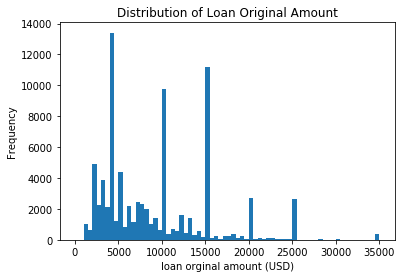

In [46]:
bins = np.arange(0, loan_final.LoanOriginalAmount.max()+500, 500 )
plt.hist(loan_final.LoanOriginalAmount, bins=bins);
plt.xlabel('loan orginal amount (USD)');
plt.ylabel('Frequency')
plt.title('Distribution of Loan Original Amount');

It seems that the distribution is right skewed with large spikes at 5k, 10k, 15k and small spikes at 25k and 20k which suggests 
that loan amount is usually a multiple of five.

### Now let's explore the `ProsperRating (Alpha)` variable

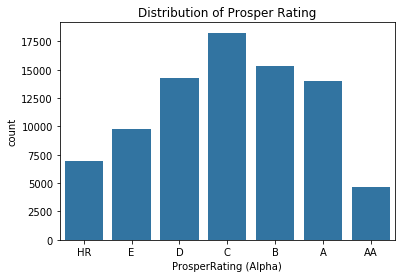

In [47]:
sns.countplot(data=loan_final, x='ProsperRating (Alpha)', color=base_color);
plt.title('Distribution of Prosper Rating');

> It seems that most ratings is from A to E with few ratings in AA and HR

### Next we will investigate the `ProsperScore` variable

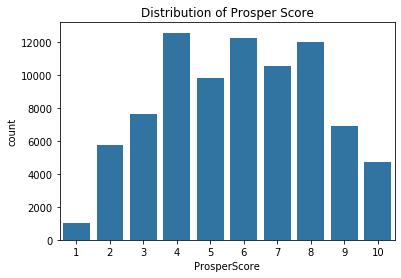

In [48]:
sns.countplot(data=loan_final, x='ProsperScore', color=base_color);
plt.title('Distribution of Prosper Score');

> It seems that distibution is almost normal with a few data points with 1 score

In [49]:
# investigation the APR of data points with ProsperScore of 1
score_1 = loan_final.query('ProsperScore == "1"')
score_1.BorrowerAPR.describe()

count    989.000000
mean       0.340572
std        0.034168
min        0.138360
25%        0.339730
50%        0.348870
75%        0.357970
max        0.413550
Name: BorrowerAPR, dtype: float64

> As expected, It seems that loans with prosperScore of one  have high APR. That shows that ProsperScore maybe a good starting point to investigate with the APR in the next part of the analysis

### Now let's take a look at `StatedMonthlyIncome` variable

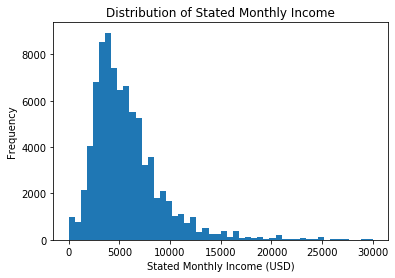

In [50]:
bins = np.arange(0, loan_final.StatedMonthlyIncome.max()+1000, 1000 )
sns.distplot(loan_final.StatedMonthlyIncome, kde=False, hist_kws={'alpha': 1});
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Stated Monthly Income');

> It seems that the distribution is right skewed with the majority of monthly income below 20k

### Next we will explore the `DebtToIncomeRatio` varialble

In [51]:
loan_final.DebtToIncomeRatio.describe()

count    83161.000000
mean         0.261585
std          0.306998
min          0.000000
25%          0.160000
50%          0.240000
75%          0.310000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

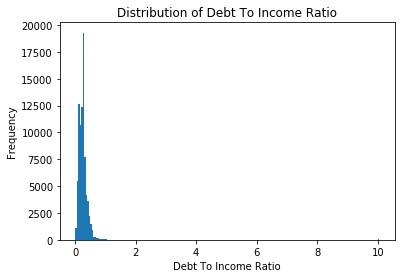

In [52]:
bins = np.arange(0, loan_final.DebtToIncomeRatio.max()+0.05, 0.05)
sns.distplot(loan_final.DebtToIncomeRatio, kde=False, bins=bins, hist_kws={'alpha': 1});
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt To Income Ratio');

Due to the presense of outliers we need to the zone of interest

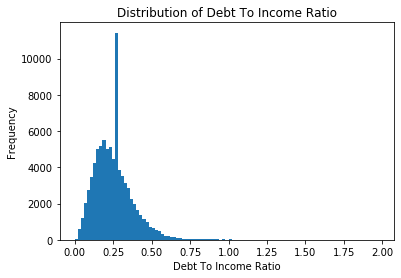

In [53]:
bins = np.arange(0, 2, 0.02)
sns.distplot(loan_final.DebtToIncomeRatio, kde=False, bins=bins, hist_kws={'alpha': 1});
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Frequency')
plt.title('Distribution of Debt To Income Ratio');

the distribution is right skewed with most values below 1.25 And the large spike is the effect of replacing the null values with mean value

### Now we will explor the `EmploymentStatus` variable

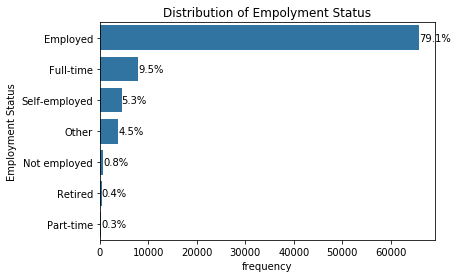

In [54]:
n_loans = loan_final.shape[0]
status_count = loan_final.EmploymentStatus.value_counts()
status_order = status_count.index
sns.countplot(data=loan_final, y='EmploymentStatus', color=base_color, order=status_order);
plt.xlabel('frequency')
plt.ylabel('Employment Status')
plt.title('Distribution of Empolyment Status');
for i in range(status_count.shape[0]):
    count = status_count[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(count+1, i, pct_string, va='center', color='k');

### Distribution of our feature of interest:

> The `BorrowerAPR` overall is normally distributed execpt a very big peak around 0.35

### Distribution of other features and operations done on these features:

* The `StatedMonthlyIncome` feature is right skewed with some unsual values the exceed 30k with some points that exceed 500k which is associated with low loan amount . After further investigation I decided to drop the values with income greater than 30k
* Aso I chose to drop the the data points with no `BorrowerAPR` as they were only 25 data points and the `BorrowerAPR` is the core of the analysis
* I chose to drop the rows with no `ProsperScore` and `ProsperRating (Alpha)` as they are not applicable for loans originated before July 2009. So I chose to work with observations originated after July 2009
* And I replaced the missing values of `DebtToIncomeRatio` with it's mean

## Bivariate Exploration

> It's getting interesting, now It's time to explore the relation between two variables at a time

### To get a high level over view of the numeric variables and they correlate together let's plot  correlation plot

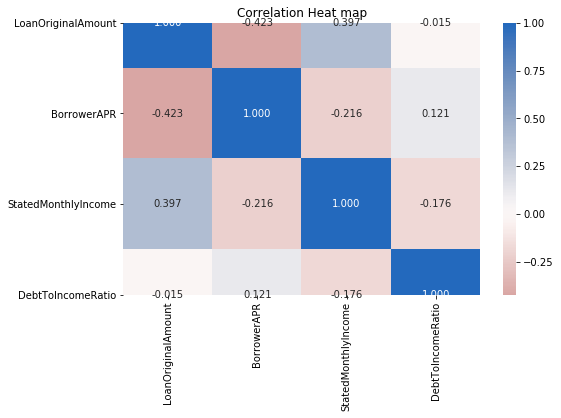

In [55]:
numeric_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio']
# correlation plot
plt.figure(figsize=(8, 5))
sns.heatmap(loan_final[numeric_vars].corr(), annot=True, fmt='.3f',
           cmap='vlag_r', center=0);
plt.title('Correlation Heat map');
plt.show()

C:\Users\Mr. X\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\Mr. X\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Mr. X\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


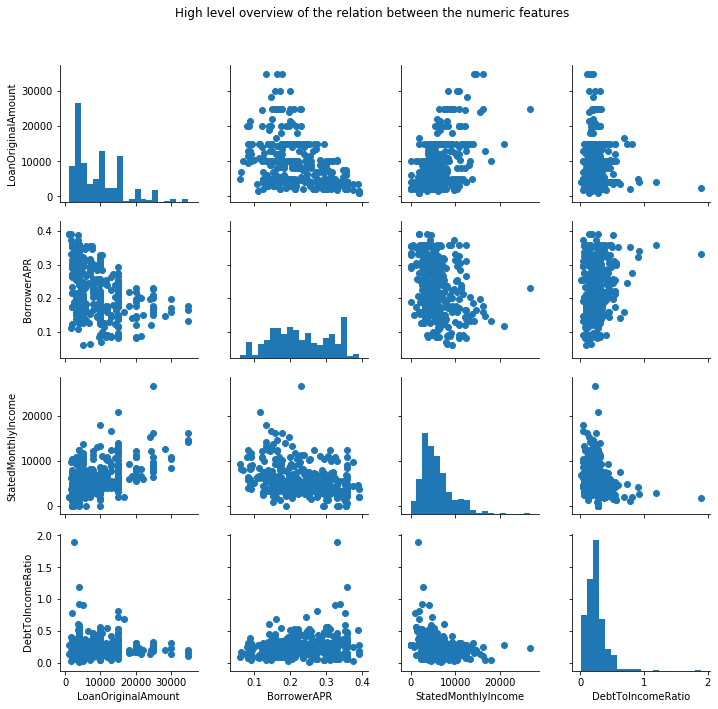

In [56]:
# plot matirx: sample 500 data points so that plots are clearer and they render faster
samples = np.random.choice(loan_final.shape[0], 500, replace=False)
loan_samples = loan_final.loc[samples, :]
g = sns.PairGrid(data=loan_samples, vars=numeric_vars)
g = g.map_diag(plt.hist, bins=20);
g.map_offdiag(plt.scatter);
plt.suptitle('High level overview of the relation between the numeric features')
plt.subplots_adjust(top=0.9);

#### Building a function that will help creating heatmaps between two variables 

In [57]:
def heat_map(df, x, y, x_inc, y_inc,x_max=None, y_max=None,  cmap='viridis_r', cmin=0.5, fig_size=(8, 6),
             color_bar=False, x_lim=None):
    '''This function will help creating heat maps quickly
    df: pd.dataframe
    x: variable name (string)
    y: variable name (string)
    x_inc: how the array for bins_x will be incremented (int/float)
    y_inc: how the array for bins_y will be incremented (int/float)
    x_max: the limit of x (int/float)
    y_max: the limit of y (int/float)
    cmap: color palette (string)
    cmin: float
    color_bar: whether or not you want a color bar (bool)
    fig_size: the size of the figure(array like object)
    '''
    if x_max == None:
        bins_x = np.arange(0, df[x].max()+x_inc, x_inc)
    else:
        bins_x = np.arange(0, x_max+x_inc, x_inc)
    if y_max == None:
        bins_y = np.arange(0, df[y].max()+y_inc, y_inc)
    else:
        bins_y = np.arange(0, y_max+y_inc, y_inc)
    plt.figure(figsize=(fig_size))
    plt.hist2d(data=df, x=x, y=y , bins=[bins_x, bins_y], cmap=cmap, cmin=cmin)
    if color_bar == True:
        plt.colorbar()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title('{} VS {}'.format(y, x))
    

### First we will start with `LoanOriginalAmount` and `BorrowerAPR`

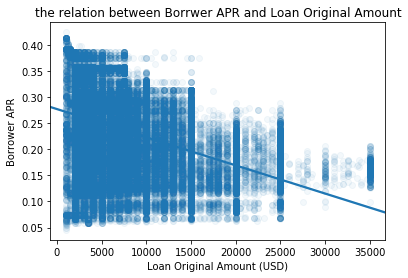

In [58]:
sns.regplot(data=loan_final, x='LoanOriginalAmount', y='BorrowerAPR', scatter_kws={'alpha': 1/20});
plt.xlabel('Loan Original Amount (USD)')
plt.ylabel('Borrower APR')
plt.title('the relation between Borrwer APR and Loan Original Amount');

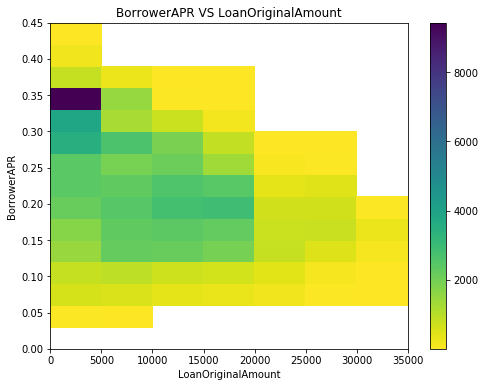

In [59]:
heat_map(df=loan_final, x='LoanOriginalAmount', y='BorrowerAPR', x_inc=5000, y_inc=0.03, cmap='viridis_r', cmin=0.5, 
        color_bar = True)

It seems that small loan amounts have high Borrower APR in general. with medium negative relation

### Now I't time to look how `BorrowerAPR` changed over time

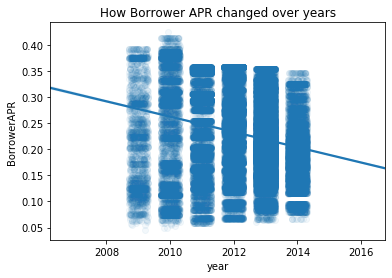

In [60]:
# adding a year column derived from the ListingCreationDate
loan_final['year'] = loan_final.ListingCreationDate.dt.year
sns.regplot(data=loan_final, x='year', y='BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.title('How Borrower APR changed over years');

It looks that `BorrowerAPr` is decreasing in general over time but let's have a closer look

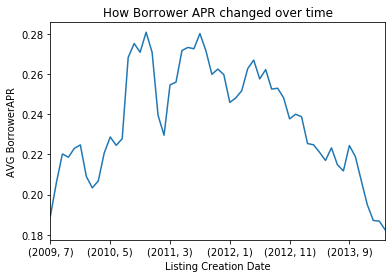

In [61]:
year = loan_final.ListingCreationDate.dt.year
month = loan_final.ListingCreationDate.dt.month
loan_final.groupby([year, month]).mean().BorrowerAPR.plot(kind='line')
plt.xlabel('Listing Creation Date')
plt.ylabel('AVG BorrowerAPR');
plt.title('How Borrower APR changed over time');

It looks that BorrowerAPr mean has been increasing from 2009 to 2011 with a significant decrease in march 2011 and has been decreasing over time since 2012

### Let's have a look on how `BorrowerAPR` mean varies by `EmploymentStatus`

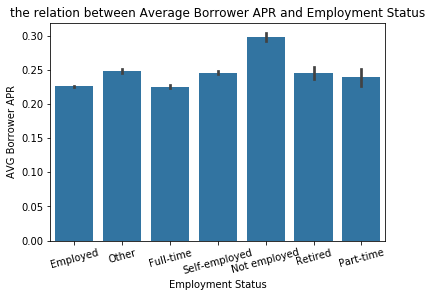

In [62]:
sns.barplot(data=loan_final, x='EmploymentStatus', y='BorrowerAPR', color=base_color)
plt.xticks(rotation=15)
plt.ylabel('AVG Borrower APR');
plt.xlabel('Employment Status')
plt.title('the relation between Average Borrower APR and Employment Status');

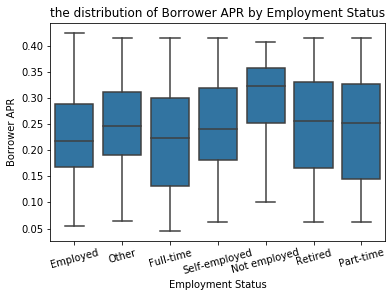

In [63]:
sns.boxplot(data=loan_final, x='EmploymentStatus', y='BorrowerAPR', color=base_color);
plt.xticks(rotation=15);
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status')
plt.title('the distribution of Borrower APR by Employment Status');

> It seems that the average `BorrowerAPR` is uniform across all categories execpt `Not employed` that have higher APR on Average

### Viewing the relation between the `BorrowerAPr` and `DebtToIncomeRatio`

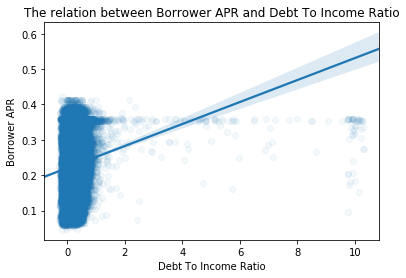

In [64]:
sns.regplot(data=loan_final, x='DebtToIncomeRatio', y='BorrowerAPR',x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.xlabel('Debt To Income Ratio')
plt.ylabel('Borrower APR')
plt.title('The relation between Borrower APR and Debt To Income Ratio');

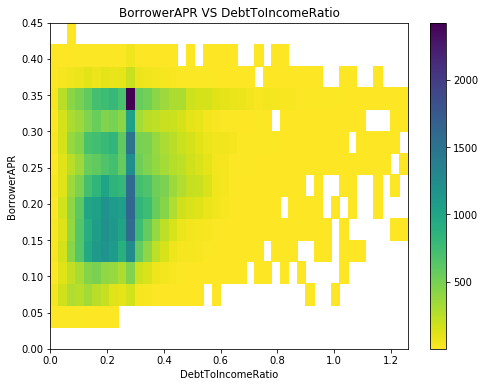

In [65]:
heat_map(df=loan_final, x='DebtToIncomeRatio', y='BorrowerAPR', x_inc=0.03, y_inc=0.03, x_max=1.25, color_bar=True)

In [66]:
loan_final[['BorrowerAPR', 'DebtToIncomeRatio']].corr()

,BorrowerAPR,DebtToIncomeRatio
BorrowerAPR,1.000000,0.120716
DebtToIncomeRatio,0.120716,1.000000


> the relation between the  `BorrowerAPr` and `DebtToIncomeRatio` is positve but weak, the fit line doesn't capture the relation correctly because of the presense of outliers

### Viewing the relation between the `BorrowerAPr` and  `StatedMonthlyIncome`

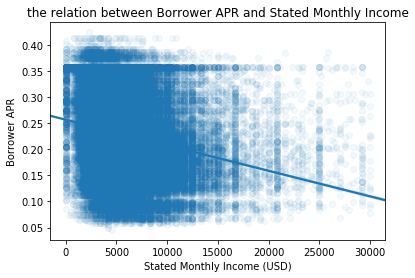

In [67]:
sns.regplot(data=loan_final, x='StatedMonthlyIncome', y='BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
plt.xlabel('Stated Monthly Income (USD)')
plt.ylabel('Borrower APR')
plt.title('the relation between Borrower APR and Stated Monthly Income');

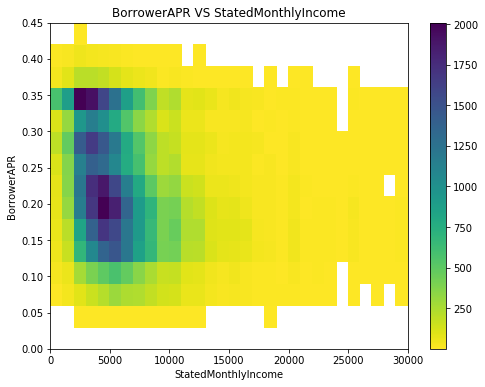

In [68]:
heat_map(df=loan_final, x='StatedMonthlyIncome', y='BorrowerAPR', x_inc=1000, y_inc=0.03, color_bar = True)

I looks that the higher the monthly income the lower the APR

### how `BorrowerAPR` mean varies by `Term`

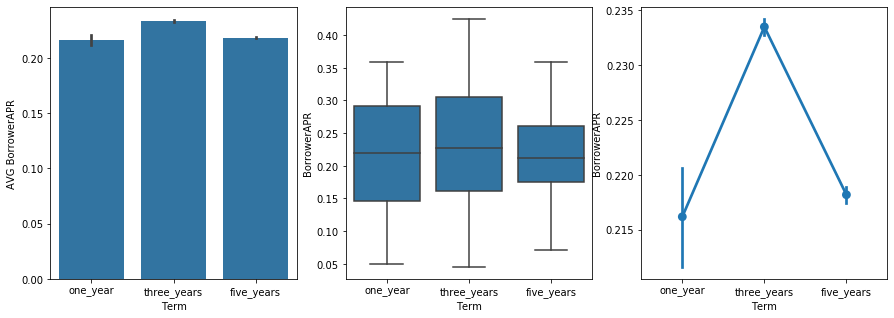

In [69]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(data=loan_final, x='Term', y='BorrowerAPR', color=base_color)
plt.ylabel('AVG BorrowerAPR');
plt.subplot(1, 3, 2)
sns.boxplot(data = loan_final, x = 'Term', y = 'BorrowerAPR', color = base_color);
plt.ylabel('BorrowerAPR');
plt.subplot(1, 3, 3)
sns.pointplot(data = loan_final, x = 'Term', y = 'BorrowerAPR');
plt.ylabel('BorrowerAPR');

> It looks that the three year term have higher APR on average but there is no general pattern as the five years term has on average lower APR than the three year term

### Let's have a look on how `BorrowerAPR` mean varies by `ProsperRating (Alpha)` And`ProsperScore` 

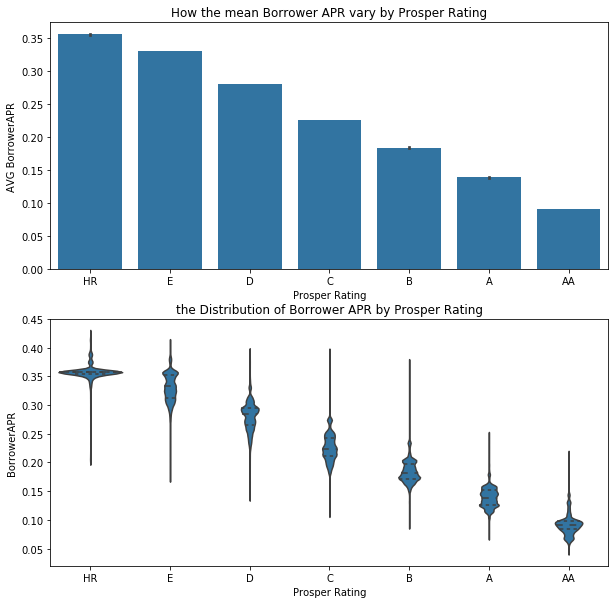

In [70]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=loan_final, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper Rating')
plt.ylabel('AVG BorrowerAPR');
plt.title('How the mean Borrower APR vary by Prosper Rating');
plt.subplot(2, 1, 2)
sns.violinplot(data=loan_final, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color, inner='quartile')
plt.xlabel('Prosper Rating')
plt.ylabel('BorrowerAPR');
plt.title('the Distribution of Borrower APR by Prosper Rating');


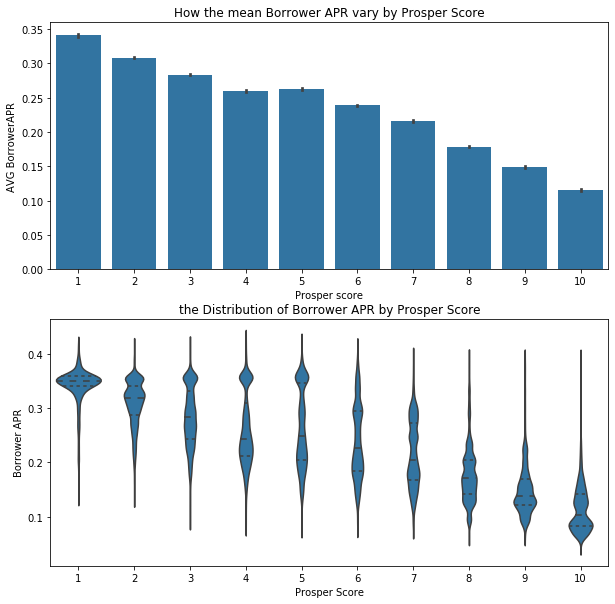

In [71]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=loan_final, x='ProsperScore', y='BorrowerAPR', color=base_color)
plt.xlabel('Prosper score')
plt.ylabel('AVG BorrowerAPR');
plt.title('How the mean Borrower APR vary by Prosper Score');
plt.subplot(2, 1, 2)
sns.violinplot(data=loan_final, x='ProsperScore', y='BorrowerAPR', color=base_color, inner='quartile')
plt.xlabel('Prosper Score')
plt.ylabel('Borrower APR');
plt.title('the Distribution of Borrower APR by Prosper Score');


> It seems that there is strong relation between average APR and score and average APR and Rating. The higher the rating or score the lower the average APR

### Investigating the relation between `ProsperScore` and  `ProsperRating (Alpha)`

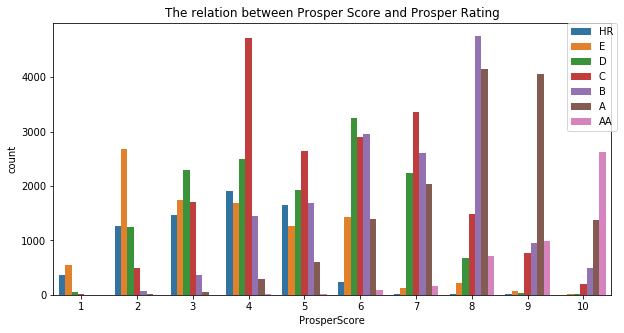

In [72]:
plt.figure(figsize=(10, 5))
sns.countplot(data=loan_final, x='ProsperScore', hue='ProsperRating (Alpha)');
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0);
plt.title('The relation between Prosper Score and Prosper Rating');

> As expected The `ProsperScore` and `ProsperRating (Alpha)` is highly positively correlated

### Investigating the relation between `DebtToIncomeRatio` and both  `ProsperScore` and `ProsperRating (Alpha)` 

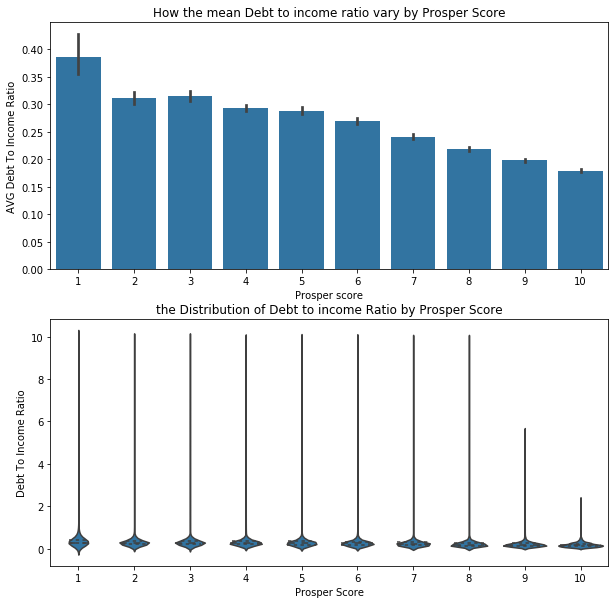

In [73]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=loan_final, x='ProsperScore', y='DebtToIncomeRatio', color=base_color)
plt.ylabel('AVG Debt To Income Ratio');
plt.xlabel('Prosper score')
plt.title('How the mean Debt to income ratio vary by Prosper Score');
plt.subplot(2, 1, 2)
sns.violinplot(data=loan_final, x='ProsperScore', y='DebtToIncomeRatio', color=base_color, inner='quartile')
plt.ylabel('Debt To Income Ratio');
plt.xlabel('Prosper Score')
plt.title('the Distribution of Debt to income Ratio by Prosper Score');


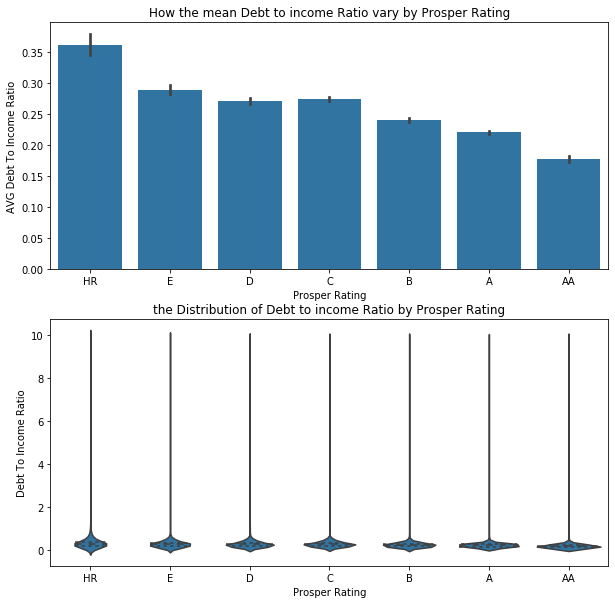

In [74]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 1, 1)
sns.barplot(data=loan_final, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color=base_color)
plt.ylabel('AVG Debt To Income Ratio');
plt.xlabel('Prosper Rating')
plt.title('How the mean Debt to income Ratio vary by Prosper Rating');
plt.subplot(2, 1, 2)
sns.violinplot(data=loan_final, x='ProsperRating (Alpha)', y='DebtToIncomeRatio', color=base_color, inner='quartile')
plt.ylabel('Debt To Income Ratio');
plt.xlabel('Prosper Rating')
plt.title('the Distribution of Debt to income Ratio by Prosper Rating');


> It seems that ProsperScore and ProsperRating (Alpha) is negatively correlated with DebtToIncomeRatio

### How the change in `ProsperRating (Alpha)` and `ProsperScore` infuence the `LoanOrignalAmount`

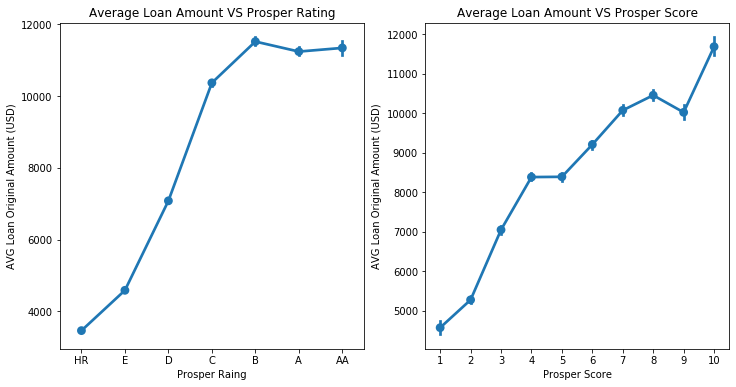

In [75]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.pointplot(data=loan_final, x='ProsperRating (Alpha)', y='LoanOriginalAmount')
plt.xlabel('Prosper Raing')
plt.ylabel('AVG Loan Original Amount (USD)');
plt.title('Average Loan Amount VS Prosper Rating');
plt.subplot(1, 2, 2)
sns.pointplot(data=loan_final, x='ProsperScore', y='LoanOriginalAmount')
plt.xlabel('Prosper Score')
plt.ylabel('AVG Loan Original Amount (USD)');
plt.title('Average Loan Amount VS Prosper Score');

It seems the loan amount on average increases with the increase of rating or score

### The relationships observed in this part of the investigation and How did the feature of interest vary with other features in the dataset:

* The `BorrowerAPR` on average was increasing from 2009 to 2012 and was decreasing from 2012 to 2014 
* The `BorrowerAPR` is highly negatively correlated with `ProsperScore` And `ProsperRating (Alpha)`
* The `BorrowerAPR` is higher on average for the data points with `Not employed` EmploymentStatus
* The `BorrowerAPR` is negatively correlated with `LoanOriginalAmount`

### Interesting relationships between the other features (not the main feature of interest):

* As expected The `ProsperScore` and `ProsperRating (Alpha)` is highly positively correlated
* ProsperScore and ProsperRating (Alpha) are negatively correlated with DebtToIncomeRatio
* Loans with high `ProsperScore` have high `LoanOriginalAmount`

## Multivariate Exploration

### Now the real fun Starts, It's time to look at the relation between more than two variables

### First we will see the effect of `ProsperRating (Alpha)` on the relation between `BorrowerAPR` and `LoanOriginalAmount`

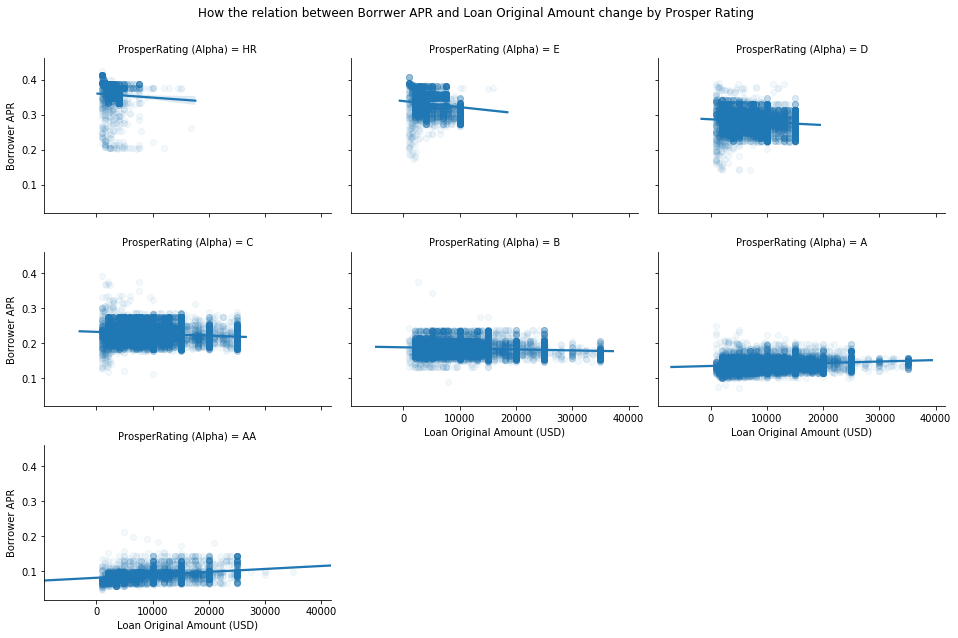

In [76]:
g = sns.FacetGrid(data=loan_final, col='ProsperRating (Alpha)', col_wrap=3, aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('Loan Original Amount (USD)')
g.set_ylabels('Borrower APR')
plt.suptitle('How the relation between Borrwer APR and Loan Original Amount change by Prosper Rating');
plt.subplots_adjust(top=0.9);

#### This seems pretty interesting, we can break the interpretation into two major observations:
1. The relation between the `BorrowerAPR` and `LoanOriginalAmount` remains negative for `ProsperRating (Alpha)` From `HR` to `B`
2.  The relation between the `BorrowerAPR` and `LoanOriginalAmount` goes from negative to positive for `ProsperRating (Alpha)` of `A` and `AA`

### Now let's look At the effect of the `Term` variable on the relation between `BorrowerAPR` and `LoanOriginalAmount`

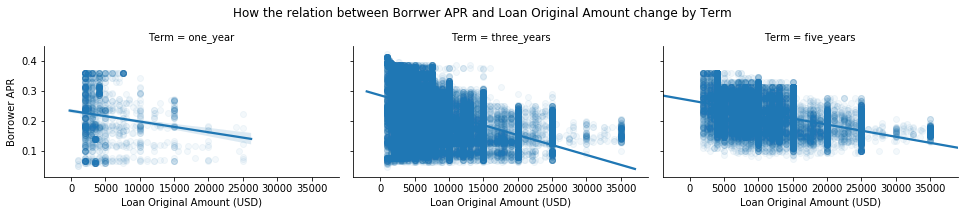

In [77]:
g = sns.FacetGrid(data=loan_final, col='Term', aspect=1.5)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.3, scatter_kws={'alpha': 1/20});
g.set_xlabels('Loan Original Amount (USD)')
g.set_ylabels('Borrower APR')
plt.suptitle('How the relation between Borrwer APR and Loan Original Amount change by Term');
plt.subplots_adjust(top=0.8);

#### It seems that the relation is still negative but the rate is different acorss the `Term` Categories as the relation is stronger for the three year and the five year terms than the one year term And this logical as usually the loan with higher Term have higher Amount

### Now let's see how `BorrowerAPR` and `ProsperScore` vary by `Term`

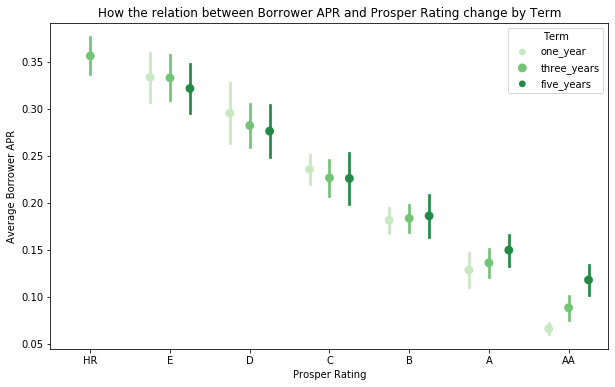

In [78]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=loan_final, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
              linestyles='', dodge=0.5, ci='sd', palette='Greens');
plt.xlabel('Prosper Rating')
plt.ylabel('Average Borrower APR');
plt.title('How the relation between Borrower APR and Prosper Rating change by Term');

#### We can describe the behaviour of  the change in relation between `BorrowerAPR` and  `ProsperRating(Alpha)` by breaking it into two major obervations:
1. the `BorrowerAPR` <strong> decrease </strong> with the increase in the `Term` for data points with rating from `HR` to `C`
2. the `BorrowerAPR` <strong>increase</strong> with the increase in the `Term` for data points with rating from `B` to `AA`

### Now let's see how `LoanOriginalAmount` and `ProsperScore` vary by `Term`

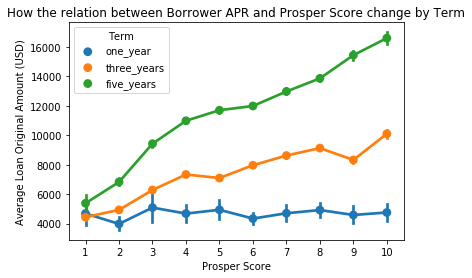

In [79]:
sns.pointplot(data=loan_final, x='ProsperScore', y='LoanOriginalAmount', hue='Term')
plt.xlabel('Prosper Score')
plt.ylabel('Average Loan Original Amount (USD)');
plt.title('How the relation between Borrower APR and Prosper Score change by Term');

> It seems that for the one year term the score doesn't influence the Loan Amount but for the three and five years term the loan amount increases with higher higher score

### Relationships observed in this part of the investigation and features that strengthened each other in terms of looking at our feature of interest?
<ul>
<li>By breaking the relaion between `BorrowerAPR` and `LoanOrignalAmount` by the `ProsperRating (Alpha)` we found two major observations:
    <oL>
        <li> The relation between the `BorrowerAPR` and `LoanOriginalAmount` remains negative for `ProsperRating (Alpha)` From `HR` to `B` that strengthen the initial observation
         <li>The relation between the `BorrowerAPR` and `LoanOriginalAmount` goes from negative to positive for `ProsperRating (Alpha)` of `A` and `AA` which disagree with the initial observation 
             
   </ol>
</li>
<li>By breaking the relaion between `BorrowerAPR` and `LoanOrignalAmount` be the<em>Term</em> It seems that the relation is still negative but the rate is different acorss the `Term` Categories as the relation is stronger for the three year and the five year terms than the one year term And this logical as usually the loan with higher Term have higher Amount. So this strengthen the initial observation
<li> By breaking the relaion between `BorrowerAPR` and `ProsperRating (Alpha)` by the <em>Term</em> we found three major observations:
    <ol>
     <li> The higher the Rating the lower The APR and that agrees with the initial observation but there is more to the story
     <li> the `BorrowerAPR` <strong> decrease </strong> with the increase in the `Term` for data points with rating from `HR` to `C`
     <li> the `BorrowerAPR` <strong>increase</strong> with the increase in the `Term` for data points with rating from `B` to `AA`

   </ol>
</li>
<li> By breaking the relaion between `ProsperScore` and `LoanOrignalAmount` by the `Term` It seems that for the one year term the score doesn't influence the Loan Amount but for the three and five years term the loan amount increases with higher higher score and this can be explained by the lack of data points with one year term
    
</ul>

### Interesting interactions between features?

1. The relation between  `BorrowerAPR` and `LoanOrignalAmount` goes from negative to positive with increase in the `ProsperRating (Alpha)` and that is pretty interesing
2. How the effect of the`Term` on the relaion between `BorrowerAPR` and `ProsperRating (Alpha)` is changing by the increase in the `Term` is intreging